### Steps:

1. convert Newick format tree to distance matrix
2. use scipy. . get linkage matrix... from distance matrix
3. use DendroHeatMap package to generate the figure...
https://github.com/themantalope/pydendroheatmap



In [4]:
%matplotlib inline
from ete3 import Tree

In [5]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [45]:
tree = Tree('/Users/qingpeng/GoogleDrive/Development/Bitbucket/genelearn_paper/Script/CvLJBVIL0CYlkaloyJbPww_newick.txt',format=1)
leaves = tree.get_leaf_names()

In [46]:
tax_list_file = open("/Users/qingpeng/GoogleDrive/Development/Bitbucket/genelearn_paper/Script/all.vect.order.index.tax_id",'r')
idx_dict = {}
k = 0
for line in tax_list_file:
    line = line.rstrip()
    idx_dict[line] = k
    k += 1
    
    

idx_labels = [idx_dict.keys()[idx_dict.values().index(i)] for i in range(0, len(idx_dict))]

In [47]:
len(idx_labels)

319

In [51]:
idx_dict['1779168']

KeyError: '1779168'

In [52]:
dmat = np.zeros((319,319))

for l1,l2 in combinations(leaves,2):
    d = tree.get_distance(l1,l2)
    if l1 in idx_dict and l2 in idx_dict:
        dmat[idx_dict[l1],idx_dict[l2]] = dmat[idx_dict[l2],idx_dict[l1]] = d
    else:
        print l1,l2
print 'Distance:'
print dmat

464095 1779168
675063 1779168
76804 1779168
11157 1779168
28883 1779168
548681 1779168
1511857 1779168
171549 1779168
200644 1779168
200666 1779168
768507 1779168
795748 1779168
48461 1779168
51291 1779168
2419 1779168
136 1779168
118964 1779168
84999 1779168
85009 1779168
85006 1779168
85012 1779168
85007 1779168
414714 1779168
85013 1779168
588673 1779168
909929 1779168
186826 1779168
1385 1779168
186802 1779168
68295 1779168
53433 1779168
1161 1779168
1212 1779168
186328 1779168
32064 1779168
32069 1779168
204457 1779168
356 1779168
766 1779168
204441 1779168
204455 1779168
213849 1779168
213115 1779168
213481 1779168
29 1779168
213462 1779168
213118 1779168
69541 1779168
225057 1779168
80840 1779168
206351 1779168
135622 1779168
118969 1779168
72273 1779168
135624 1779168
72274 1779168
135614 1779168
135619 1779168
135618 1779168
135613 1779168
203491 1779168
28017 1779168
31395 1779168
75739 1779168
5819 1779168
41165 1779168
2877 1779168
3009 1779168
2886 1779168
38748 1779168
35

In [53]:
len(dmat)

319

In [54]:
schlink = sch.linkage(scipy.spatial.distance.squareform(dmat),method='average',metric='euclidean')

print 'Linkage from scipy:'
print schlink

Linkage from scipy:
[[   0.           36.            0.            2.        ]
 [   4.          195.            2.            2.        ]
 [   7.            8.            2.            2.        ]
 ..., 
 [ 630.          633.           21.61463415  233.        ]
 [ 626.          631.           24.3726132    86.        ]
 [ 634.          635.           28.58219383  319.        ]]


In [14]:
import pydendroheatmap as pdh

In [25]:
import pandas as pd

In [26]:
matrix = pd.read_csv('../../Pipeline/MultiClass/Order/matrix.txt',sep = '\s+',header=None)

In [27]:
df2 = matrix.div(matrix.sum(axis=1),axis=0)

In [28]:
df3 = df2.drop([33,35,41])

In [29]:
df4 = df3.drop([33,35,41],axis=1)

In [35]:
data = df4.values

In [36]:
data

array([[ 0.        ,  0.04897959,  0.00408163, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.83437892,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.26917952,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.65468194,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.0418251 ]])

In [58]:
row_idxing = sch.leaves_list(schlink)
col_idxing = sch.leaves_list(schlink)

In [65]:
col_idxing

array([193,  17, 201, 200,  14,  16,  15,  13, 196, 197,  11,  12, 199,
       198,   9,  10,   4, 195,  18, 205, 202, 203, 204, 194,   6,   5,
         7,   8, 228, 230,  62,  63,  66,  64,  65, 226,  54,  52,  53,
        57,  55,  56,  61,  60,  58,  59, 248, 249,  70,  68,  69, 233,
        51, 234, 224, 239, 238, 237, 235, 236, 240, 241, 244, 242, 243,
       247,  67, 245, 246, 231, 232, 229, 225, 227,  93,  91,  92,  96,
        90,  88,  89,  94,  95, 211,  20,  21, 213, 212,  22,  23,  24,
        31, 216,  30,  29, 215,  25,  27, 214,  26,  28, 143, 314, 176,
       174, 175, 318, 186, 187, 185, 177, 182, 317, 178, 316, 184, 183,
       181, 179, 180, 315, 146, 306, 147, 148, 145, 304, 149, 308, 154,
       153, 152, 150, 151, 310, 309, 167, 166, 165, 164, 163, 160, 161,
       172, 173, 162, 159, 158, 157, 155, 156, 307, 305, 142, 144, 313,
       169, 171, 312, 311, 168, 170, 141, 139, 140, 302, 303, 301, 138,
       300,  19, 210, 299, 189, 190, 209, 206, 207, 208, 298, 29

193: 589350: first : Cryptomonadales Eukaryota


280:8293: Caudata: 


Lineage i	› cellular organisms
   › Eukaryota
     › Opisthokonta
       › Metazoa
         › Eumetazoa
           › Bilateria
             › Deuterostomia
               › Chordata
                 › Craniata
                   › Vertebrata
                     › Gnathostomata
                       › Teleostomi
                         › Euteleostomi
                           › Sarcopterygii
                             › Dipnotetrapodomorpha
                               › Tetrapoda
                                 › Amphibia
                                   › Batrachia
                                   

In [59]:
data = data[:,col_idxing][row_idxing,:]

#### Align the heatmap to taxonomic tree



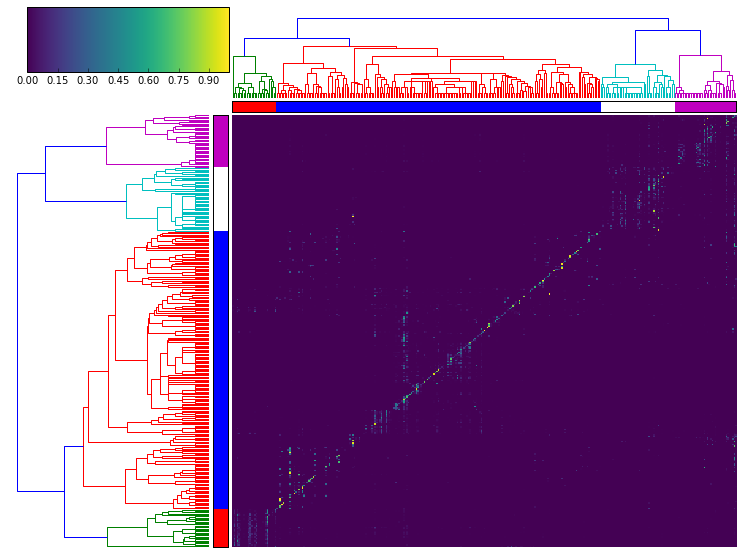

In [68]:
    heatmap = pdh.DendroHeatMap(heat_map_data=data, left_dendrogram=schlink, top_dendrogram=schlink)
    #heatmap.row_labels = row_labels
    #heatmap.col_labels = col_labels
 #   heatmap.title = 'An example heatmap'
    heatmap.colormap = plt.cm.viridis
 #   heatmap.colormap = plt.cm.Blues
 #   heatmap.colormap = heatmap.yellowBlackBlue
    heatmap.show()

### Original heatmap

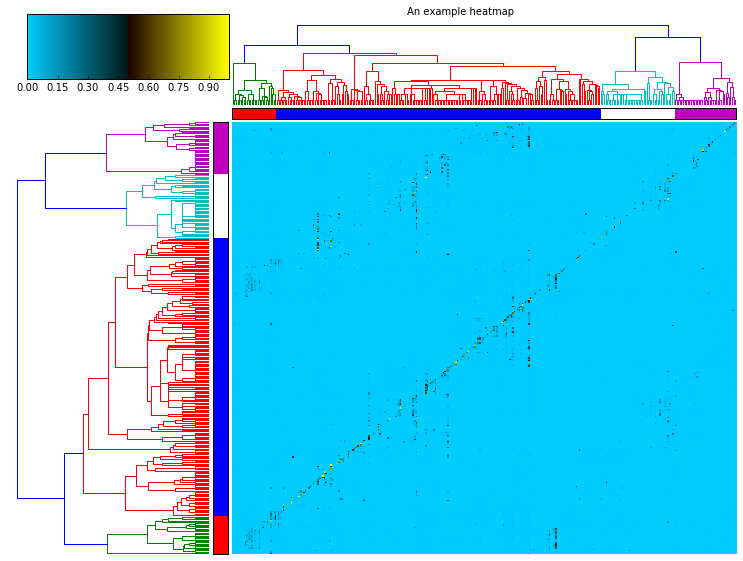

In [63]:
    heatmap = pdh.DendroHeatMap(heat_map_data=df4.values, left_dendrogram=schlink, top_dendrogram=schlink)
    #heatmap.row_labels = row_labels
    #heatmap.col_labels = col_labels
    heatmap.title = 'An example heatmap'
 #   heatmap.colormap = plt.cm.Blues
    heatmap.colormap = heatmap.yellowBlackBlue
    heatmap.show()